In [2]:
import numpy as np

X = np.load("../data/home_credit/X_clean.npy")
y = np.load("../data/home_credit/y_clean.npy")

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (307511, 219)
y shape: (307511,)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (246008, 219)
X_test shape: (61503, 219)
y_train shape: (246008,)
y_test shape: (61503,)


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


In [5]:
log_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

log_model.fit(X_train, y_train)

print("Logistic Regression training completed.")


Logistic Regression training completed.


In [6]:
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))


              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56538
           1       0.16      0.68      0.26      4965

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.90      0.69      0.76     61503

ROC-AUC: 0.7490569506015738


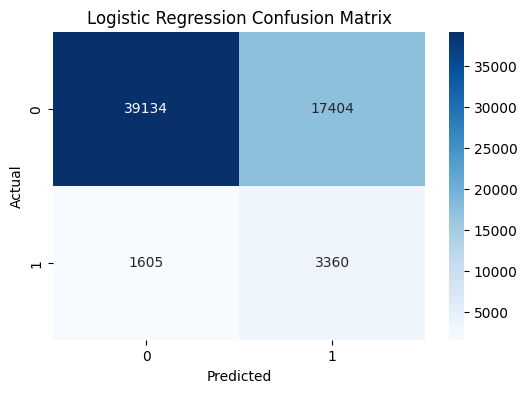

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:
tree_model = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=50,
    random_state=42
)

tree_model.fit(X_train, y_train)

print("Decision Tree training completed.")


Decision Tree training completed.


In [9]:
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred_tree))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_tree))


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.28      0.02      0.03      4965

    accuracy                           0.92     61503
   macro avg       0.60      0.51      0.49     61503
weighted avg       0.87      0.92      0.88     61503

ROC-AUC: 0.715501928548123


In [10]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_log),
        roc_auc_score(y_test, y_prob_tree)
    ]
})

results


,Model,ROC-AUC
0,Logistic Regression,0.749057
1,Decision Tree,0.715502


In [11]:
import joblib

joblib.dump(log_model, "../models/logistic_baseline.pkl")
joblib.dump(tree_model, "../models/tree_baseline.pkl")

print("Baseline models saved successfully.")


Baseline models saved successfully.
